In [2]:
import networkx as nx
import matplotlib.pyplot as plt

In [3]:
graph = nx.Graph()


In [4]:
#define
ver = ['A', 'B', 'C', 'D', 'E', 'F']
edges = [('A', 'B'), ('A', 'C'), ('A', 'E'),
         ('B', 'C'), ('B', 'D'), ('B', 'E'), ('B', 'F'), 
         ('C', 'E'), 
         ('D', 'E'), ('D', 'F')]

pos = {
    'A': (1,3), 'B': (3,3), 'C': (4,0), 
    'D': (0,0), 'E': (1,-1), 'F': (3,-1)
}

In [5]:
graph.add_nodes_from(ver)
graph.add_edges_from(edges)

Text(0.5, 1.0, 'Graph Visualization')

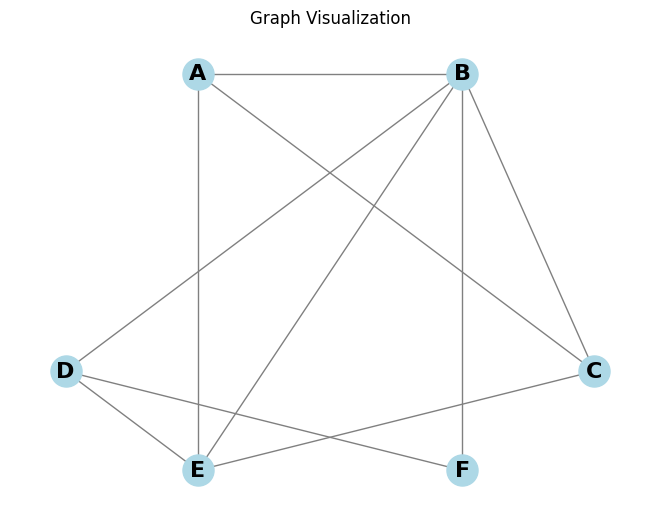

In [6]:
nx.draw(graph, pos, with_labels=True, node_color='lightblue', node_size=500, font_size=16, font_weight='bold', edge_color='gray')
plt.title("Graph Visualization")

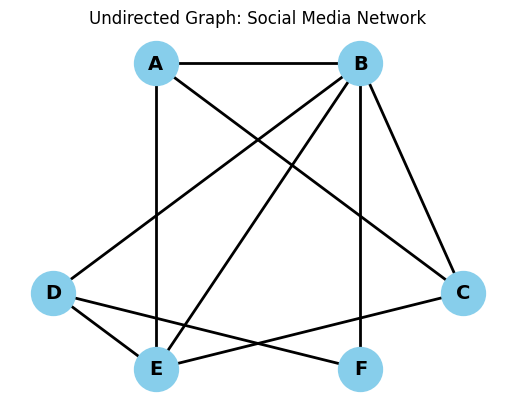

In [7]:
# Step 5: Draw and label the graph
nx.draw_networkx_nodes(graph, pos, node_color='skyblue', node_size=1000)
nx.draw_networkx_edges(graph, pos, width=2)
nx.draw_networkx_labels(graph, pos, font_size=14, font_weight='bold')
plt.title("Undirected Graph: Social Media Network")
plt.axis('off')
plt.show()

### **2.1**

In [8]:
#find neighbors

neighbors_A = list(graph.neighbors('A'))
neighbors_E = list(graph.neighbors('E'))

print("Neighbors of A:", neighbors_A)
print("Neighbors of E:", neighbors_E)

Neighbors of A: ['B', 'C', 'E']
Neighbors of E: ['A', 'B', 'C', 'D']


In [9]:
#visualisation

color_map = []
for i in graph.nodes():
    if i in list(graph.neighbors('A')):
        color_map.append('red')
    elif i == 'A':
        color_map.append('red')
    else:
        color_map.append('lightblue')

print(color_map)

['red', 'red', 'red', 'lightblue', 'red', 'lightblue']


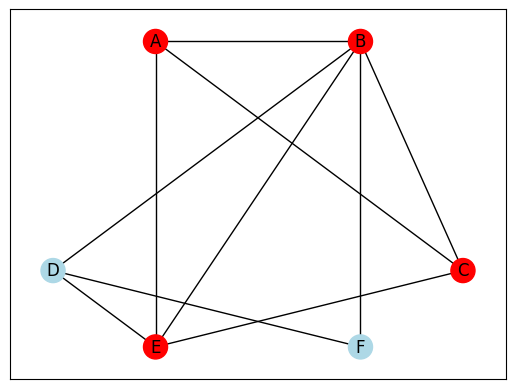

In [10]:
nx.draw_networkx_nodes(graph, pos = pos, node_color = color_map)
nx.draw_networkx_labels(graph, pos = pos)
nx.draw_networkx_edges(graph, pos=pos)
plt.show()

### **2.2**

In [11]:
print(graph.degree('A'))
print(graph.degree())

3
[('A', 3), ('B', 5), ('C', 3), ('D', 3), ('E', 4), ('F', 2)]


In [13]:
#show connection

def show_connection(graph):
    # Get a list of all nodes and their degrees
    degrees = dict(graph.degree())
    # Find min and max degree
    min_degree = min(degrees.values())
    max_degree = max(degrees.values())
    
    # Find all nodes with min and max degree
    introverts = [node for node, deg in degrees.items() if deg == min_degree]
    extroverts = [node for node, deg in degrees.items() if deg == max_degree]
    
    print(f"Introvert(s) (fewest connections: {min_degree}): {introverts}")
    print(f"Extrovert(s) (most connections: {max_degree}): {extroverts}")
    
    return introverts, extroverts

# Call the function
introverts, extroverts = show_connection(graph)

Introvert(s) (fewest connections: 2): ['F']
Extrovert(s) (most connections: 5): ['B']


### **2.3**

- list all simple path

- write smatest path from E to F

-  add green colors on edges that show a path from F to E.

In [14]:
list(nx.all_simple_paths(graph, source='E', target='F'))

[['E', 'A', 'B', 'D', 'F'],
 ['E', 'A', 'B', 'F'],
 ['E', 'A', 'C', 'B', 'D', 'F'],
 ['E', 'A', 'C', 'B', 'F'],
 ['E', 'B', 'D', 'F'],
 ['E', 'B', 'F'],
 ['E', 'C', 'A', 'B', 'D', 'F'],
 ['E', 'C', 'A', 'B', 'F'],
 ['E', 'C', 'B', 'D', 'F'],
 ['E', 'C', 'B', 'F'],
 ['E', 'D', 'B', 'F'],
 ['E', 'D', 'F']]

In [17]:
def smartest_path(graph, source, target):
    all_paths = list(nx.all_simple_paths(graph, source=source, target=target))
    if not all_paths:
        return None
    # Find the shortest path
    shortest_path = min(all_paths, key=len)
    return shortest_path

path_EF = smartest_path(graph, 'E', 'F')

path_EF

['E', 'B', 'F']

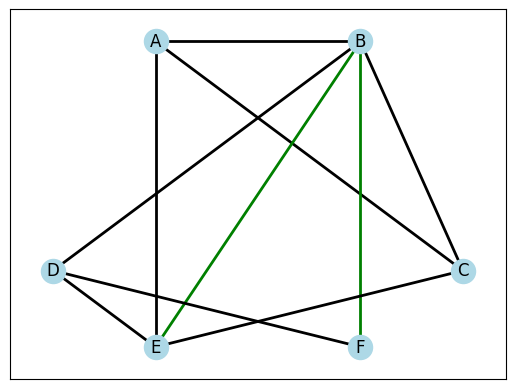

In [19]:
#add green colors on edges that show a path from F to E.
edge_colors = []

for edge in graph.edges():
    if (edge[0] in path_EF and edge[1] in path_EF) or (edge[1] in path_EF and edge[0] in path_EF):
        edge_colors.append('green')
    else:
        edge_colors.append('black')
nx.draw_networkx_nodes(graph, pos = pos, node_color = 'lightblue')
nx.draw_networkx_labels(graph, pos = pos)
nx.draw_networkx_edges(graph, pos=pos, edge_color=edge_colors, width=2)
plt.show()


### **3 : Modifying the Graph**

### **3.1**

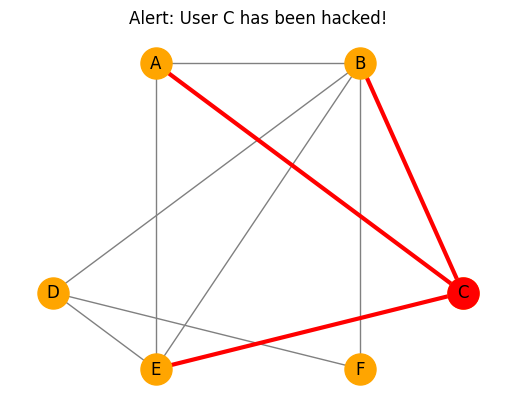

In [22]:
#high light the Hacked user

#draw graph with highlighted hacked user
nx.draw_networkx_nodes(graph, pos = pos, node_color= 'orange', node_size=500)
nx.draw_networkx_labels(graph, pos = pos)
nx.draw_networkx_edges(graph, pos = pos, edge_color='gray')

#highlight user C
nx.draw_networkx_nodes(graph, pos = pos, nodelist=['C'], node_color='red', node_size=500)

#find all edges connected to C
edges_C = list(graph.edges('C'))
nx.draw_networkx_edges(graph, pos = pos, edgelist=edges_C, edge_color='red', width=3)

plt.title("Alert: User C has been hacked!")
plt.axis('off')
plt.show()

### **3.2. Removing Hacked User**

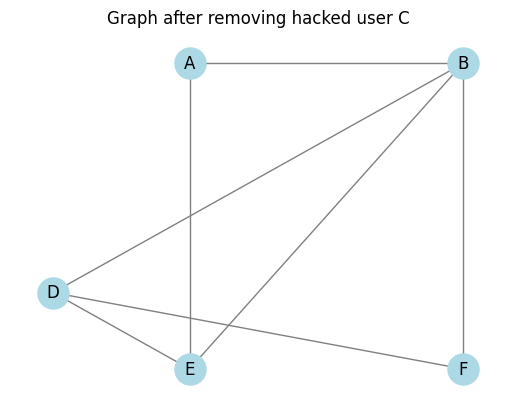

In [24]:
update_graph = graph.copy()

update_graph.remove_node('C')


# Note: You might need to update the `pos` dictionary to remove 'C' as well, or drawing will throw an error.
update_pos = {node: coord for node, coord in pos.items() if node != 'C'}

nx.draw_networkx_nodes(update_graph, pos = update_pos, node_color= 'lightblue', node_size=500)
nx.draw_networkx_labels(update_graph, pos = update_pos) 
nx.draw_networkx_edges(update_graph, pos = update_pos, edge_color='gray')

plt.title("Graph after removing hacked user C")
plt.axis('off')
plt.show()

Updated positions: {'A': (1, 3), 'B': (3, 3), 'D': (0, 0), 'E': (1, -1), 'F': (3, -1), 'Z': (2, 4), 'J': (4, 4), 'K': (0, -1), 'C0': (4, 2)}


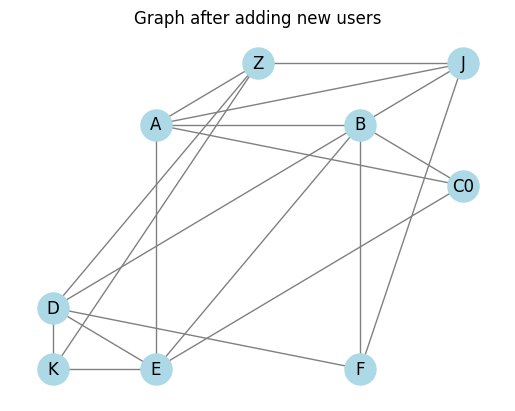

In [29]:
# add new users
new_users = ['Z', 'J', 'K', 'C0']
update_graph.add_nodes_from(new_users)

#define new edges from new users to existing users
new_edges = [
    ('Z', 'A'), ('Z', 'D'), ('Z', 'J'),
    ('J', 'A'), ('J', 'B'), ('J', 'F'),
    ('K', 'D'), ('K', 'E'), ('K', 'Z'),
    ('C0', 'A'), ('C0', 'B'), ('C0', 'E')
]
update_graph.add_edges_from(new_edges)

#update positions for new users
update_pos.update({
    'Z': (2, 4), 'J': (4, 4), 'K': (0, -1), 'C0': (4, 2)
})

print("Updated positions:", update_pos)

nx.draw_networkx_nodes(update_graph, pos = update_pos, node_color= 'lightblue', node_size=500)
nx.draw_networkx_labels(update_graph, pos = update_pos)
nx.draw_networkx_edges(update_graph, pos = update_pos, edge_color='gray')
plt.title("Graph after adding new users")
plt.axis('off')
plt.show()

### **Directed Graph: Currency Exchange Network**

Nodes of graph: ['USD', 'EUR', 'KHR', 'JPY', 'AUD']
Edges of graph with weights: [('USD', 'KHR', {'weight': 4034}), ('USD', 'EUR', {'weight': 0.8884482185724769}), ('USD', 'JPY', {'weight': 160.372745}), ('USD', 'AUD', {'weight': 1.6230973241617512}), ('EUR', 'USD', {'weight': 1.181335}), ('KHR', 'USD', {'weight': 0.00024912805181863477}), ('KHR', 'JPY', {'weight': 0.039755266578940046}), ('KHR', 'AUD', {'weight': 0.0004023545789962863}), ('JPY', 'KHR', {'weight': 27.0393}), ('JPY', 'USD', {'weight': 0.0067362481128316705}), ('AUD', 'USD', {'weight': 0.658097}), ('AUD', 'KHR', {'weight': 2611.6})]

 ______________________________________________________

USD to JPY sell rate: 160.372745
EUR to USD buy rate: 0.8884482185724769


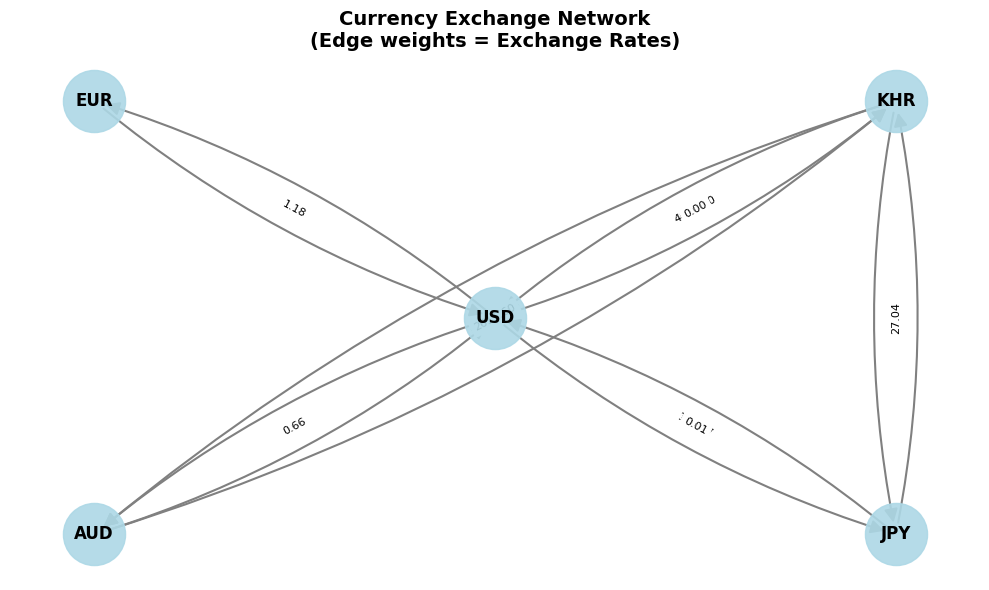


--- Complete Exchange Rate Table ---
Direction | Rate
------------------------------
USD → KHR | 4034.000000
USD → EUR | 0.888448
USD → JPY | 160.372745
USD → AUD | 1.623097
EUR → USD | 1.181335
KHR → USD | 0.000249
KHR → JPY | 0.039755
KHR → AUD | 0.000402
JPY → KHR | 27.039300
JPY → USD | 0.006736
AUD → USD | 0.658097
AUD → KHR | 2611.600000


In [38]:
#1.1
G = nx.DiGraph()

#1.2
node = ['USD', 'EUR', 'KHR', 'JPY','AUD']

edge_var = [
    # USD/KHR: Bank buys KHR at 4014, sells at 4034
    ('USD', 'KHR', 4034),  # XYZ Sells: 1 USD = 4034 KHR
    ('KHR', 'USD', 1/4014), # XYZ Buys: 1 KHR = 1/4014 USD
    
    # EUR/USD: Bank buys USD at 1.125558, sells at 1.181335  
    ('EUR', 'USD', 1.181335),  # XYZ Sells: 1 EUR = 1.181335 USD
    ('USD', 'EUR', 1/1.125558), # XYZ Buys: 1 USD = 1/1.125558 EUR
    
    # JPY/KHR: Bank buys KHR at 25.1539, sells at 27.0393
    ('JPY', 'KHR', 27.0393),   # XYZ Sells: 1 JPY = 27.0393 KHR
    ('KHR', 'JPY', 1/25.1539), # XYZ Buys: 1 KHR = 1/25.1539 JPY
    
    # USD/JPY: Bank buys JPY at 148.450589, sells at 160.372745
    ('USD', 'JPY', 160.372745), # XYZ Sells: 1 USD = 160.372745 JPY
    ('JPY', 'USD', 1/148.450589), # XYZ Buys: 1 JPY = 1/148.450589 USD
    
    # AUD/USD: Bank buys USD at 0.616106, sells at 0.658097
    ('AUD', 'USD', 0.658097),   # XYZ Sells: 1 AUD = 0.658097 USD
    ('USD', 'AUD', 1/0.616106), # XYZ Buys: 1 USD = 1/0.616106 AUD
    
    # AUD/KHR: Bank buys KHR at 2485.37, sells at 2611.60
    ('AUD', 'KHR', 2611.60),   # XYZ Sells: 1 AUD = 2611.60 KHR
    ('KHR', 'AUD', 1/2485.37)  # XYZ Buys: 1 KHR = 1/2485.37 AUD
]

position = {
    'USD' : (0, 0),
    'EUR' : (-2, 1),
    'KHR' : (2, 1),
    'JPY' : (2, -1),
    'AUD' : (-2, -1)
}

#1.3
G.add_nodes_from(node)
G.add_weighted_edges_from(edge_var)

print("Nodes of graph:", G.nodes())
print("Edges of graph with weights:", G.edges(data=True))


#1.4
print("\n ______________________________________________________\n")

#bank XYZ sells between USD and JPY
try:
    usd_jpy_sell = G['USD']['JPY']['weight']
    print(f"USD to JPY sell rate: {usd_jpy_sell}")
except KeyError:
    print("Edge from USD to JPY does not exist.")


#bank XYZ buys between EUR and USD
try:
    eur_usd_buy = G['USD']['EUR']['weight']
    print(f"EUR to USD buy rate: {eur_usd_buy}")
except KeyError:
    print("Edge from USD to EUR does not exist.")


# 1.5 Visualize the graph
plt.figure(figsize=(10, 6))

# Draw nodes
nx.draw_networkx_nodes(G, pos=position, node_color='lightblue', 
                      node_size=2000, alpha=0.9)

# Draw node labels
nx.draw_networkx_labels(G, pos=position, font_size=12, font_weight='bold')

# Draw edges with arrows and curvature
nx.draw_networkx_edges(G, pos=position, edge_color='gray', 
                      arrows=True, arrowsize=20,
                      connectionstyle="arc3,rad=0.1",
                      width=1.5)

# Draw edge labels (weights)
edge_labels = {(u, v): f"{d['weight']:.2f}" 
               for u, v, d in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, pos=position, edge_labels=edge_labels, 
                            font_size=8)

plt.title("Currency Exchange Network\n(Edge weights = Exchange Rates)", 
          fontsize=14, fontweight='bold')
plt.axis('off')
plt.tight_layout()
plt.show()

# Additional: Display all exchange rates clearly
print("\n--- Complete Exchange Rate Table ---")
print("Direction | Rate")
print("-" * 30)
for u, v, data in G.edges(data=True):
    print(f"{u} → {v} | {data['weight']:.6f}")
